# Creating CNN using Scratch and Transfer Learning


In [1]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
# re-sizing all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'

In [4]:
#I now import the vgg 19 library and add preprocessing layers to the front
#Here i am also using imaget weights
#the [3] represents the RGB channels every colour images will be having 3 rgb channels

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
#we will not be training existing weights, because we r doing transfer learning
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
from glob import glob
folders = glob('Train/*')

In [8]:
folders

['Train\\Parasite', 'Train\\Uninfected']

In [9]:
X=Flatten()(mobilnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(X)

model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
from tensorflow.keras.layers import MaxPooling2D

In [16]:
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 64)       0

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [28]:
#here we are using image data Augmentation, and we use image data generator to import image from the dataset
#for image augmentation i have just rescaled the image nothing else
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [19]:
#for training dataset i select the folders in which the training photos are present
training_set = train_datagen.flow_from_directory('Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [20]:
training_set

In [21]:
test_set = test_datagen.flow_from_directory('Test',
                                           target_size = (224,224),
                                           batch_size = 32,
                                           class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [22]:
test_set

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  verbose = 1,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 19s 1s/step - loss: 1.4282 - accuracy: 0.5409 - val_loss: 0.8714 - val_accuracy: 0.3358
Epoch 2/50
13/13 [==============================] - 19s 1s/step - loss: 0.6408 - accuracy: 0.6298 - val_loss: 0.6986 - val_accuracy: 0.5149
Epoch 3/50
13/13 [==============================] - 21s 2s/step - loss: 0.5332 - accuracy: 0.6779 - val_loss: 0.9178 - val_accuracy: 0.3134
Epoch 4/50
13/13 [==============================] - 22s 2s/step - loss: 0.4516 - accuracy: 0.7644 - val_loss: 1.1329 - val_accuracy: 0.3358
Epoch 5/50
13/13 [==============================] - 20s 2s/step - loss: 0.4000 - accuracy: 0.8125 - val_loss: 0.8183 - val_accuracy: 0.4478
Epoch 6/50
13/13 [==============================] - 21s 2s/step - loss: 0.3573 - accuracy: 0.8389 - val_loss: 0.7835 - val_accuracy: 0.4701
Epoch 7/50
13/13 [==============================] - 20s 2s/step - loss: 0.3700 - accuracy: 0.8438 - val_loss: 0.6283 - val_accuracy: 0.6045
Epoch 8/50
13/13 [==

In [25]:
scores = model.evaluate(test_set)

5/5 [==============================] - 1s 139ms/step - loss: 0.3237 - accuracy: 0.8507


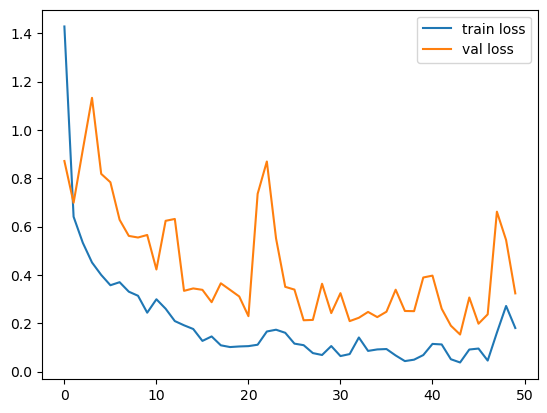

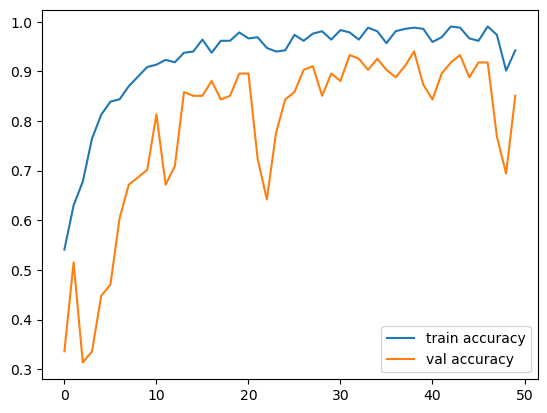

<Figure size 640x480 with 0 Axes>

In [26]:
#Here we plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#Here we plot the accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('AccVal_accuracy')

In [27]:
from tensorflow.keras.models import load_model
model.save('model_mobilnet.h5')